In [20]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
from os.path import join

In [21]:
def find_largest_contour(image):
    """
    This function finds all the contours in an image and return the largest
    contour area.
    :param image: a binary image
    """
    image = image.astype(np.uint8)
    contours, hierarchy = cv2.findContours(
        image,
        cv2.RETR_TREE,
        cv2.CHAIN_APPROX_SIMPLE
    )
    largest_contour = max(contours, key=cv2.contourArea)
    return largest_contour

In [22]:
def show(image):
    """
    A simple function to visualize OpenCV images on screen.
    :param name: a string signifying the imshow() window name
    :param image: NumPy image to show 
    """
    plt.imshow(image)
    plt.show()

In [23]:
def apply_new_background(mask3d, foreground, save_name):
    """
    This function applies a new background to the extracted foreground image
    if `--new-background` flag is `True` while executing the file.
    :param mask3d: mask3d mask containing the foreground binary pixels
    :param foreground: mask containg the extracted foreground image
    :param save_name: name of the input image file
    """
    # normalization of mask3d mask, keeping values between 0 and 1
    mask3d = mask3d / 255.0
    # get the scaled product by multiplying
    foreground = cv2.multiply(mask3d, foreground)
    # read the new background image
    background = cv2.imread('input/background.jpg')
    # resize it according to the foreground image
    background = cv2.resize(background, (foreground.shape[1], foreground.shape[0]))
    background = background.astype(np.float)
    # get the scaled product by multiplying
    background = cv2.multiply(1.0 - mask3d, background)
    # add the foreground and new background image
    new_image = cv2.add(foreground, background)
    show('New image', new_image.astype(np.uint8))
    cv2.imwrite(f"outputs/{save_name}_new_background.jpg", new_image)

In [71]:
def get_segmentation(img_path):
    mask_path = img_path.replace("img", "mask")
    print(mask_path)
    image = cv2.imread(img_path)
    # imgplot = plt.imshow(image)
    # plt.show()

    
# blur the image to smmooth out the edges a bit, also reduces a bit of noise
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    # convert the image to grayscale 
    gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
    # apply thresholding to conver the image to binary format
    # after this operation all the pixels below 200 value will be 0...
    # and all th pixels above 200 will be 255

    # ret, gray = cv2.threshold(gray, 245 , 255, cv2.CHAIN_APPROX_NONE)
    ret, gray = cv2.threshold(gray, 240 , 255, cv2.CHAIN_APPROX_NONE)


    contour = find_largest_contour(gray)
    image_contour = np.copy(image)
    cv2.drawContours(image_contour, [contour], 0, (0, 255, 0), 2, cv2.LINE_AA, maxLevel=1)

    # plt.imshow(image_contour)
    # plt.show()
    
    mask = np.zeros_like(gray)
# fill the new mask with the shape of the largest contour
# all the pixels inside that area will be white 
    cv2.fillPoly(mask, [contour], 255)
    # create a copy of the current mask
    res_mask = np.copy(mask)
    res_mask[mask == 0] = cv2.GC_BGD # obvious background pixels
    res_mask[mask == 255] = cv2.GC_PR_BGD # probable background pixels
    res_mask[mask == 255] = cv2.GC_FGD # obvious foreground pixels

    mask2 = np.where(
        (res_mask == cv2.GC_FGD) | (res_mask == cv2.GC_PR_FGD),
        255,
        0
    ).astype('uint8')


    new_mask3d = mask2
    mask3d = new_mask3d
    mask3d[new_mask3d > 0] = 255.0
    mask3d[mask3d > 255] = 255.0
    # apply Gaussian blurring to smoothen out the edges a bit
    # `mask3d` is the final foreground mask (not extracted foreground image)
    mask3d = cv2.GaussianBlur(mask3d, (5, 5), 0)
    plt.imshow(mask3d)
    plt.show()

    cv2.imwrite(mask_path, mask3d)  

datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation/background/mask/sample_2.jpg


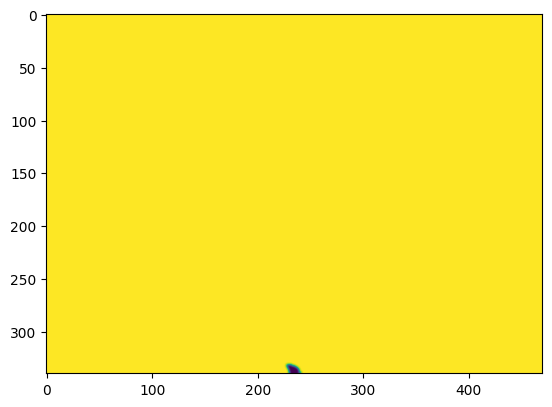

In [72]:
img_path = "datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation/background/img/sample_2.jpg"
get_segmentation(img_path)

In [14]:
def process(root_dir):
    for (root,dirs,files) in os.walk(root_dir, topdown=True):
        print (root)
        print (dirs)
        print (files)
        for file in files:
            file_path = os.path.join(root, file)
            if "mask" not in file_path:
                if ".jpg" in file_path: 
                    get_segmentation(file_path)


datasets/Endovis2017/visual_prompt/no_combination/
['binary_segmentation', 'instrument_segmentation', 'part_segmentation']
[]
datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation
['background', 'instrument']
['readme.txt']
datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation\background
['img', 'mask']
[]
datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation\background\img
[]
['sample_1.jpg']
datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation\background\mask\sample_1.jpg


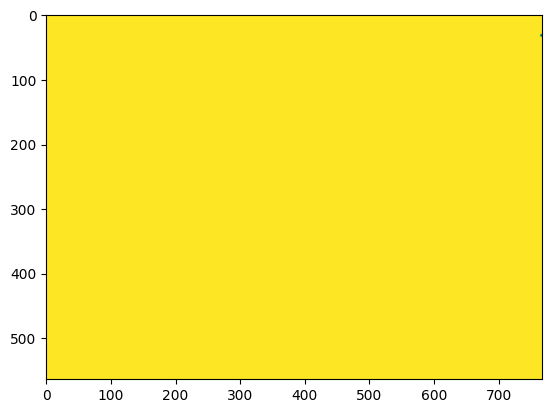

datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation\background\mask
[]
['sample_1.jpg']
datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation\instrument
['img', 'mask']
[]
datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation\instrument\img
[]
['bipolar_forceps.jpg', 'grasping_retractor.jpg', 'monopolar_curved_scissors.jpg', 'needle_driver.jpg', 'prograsp_forceps.jpg', 'vessel_sealer.jpg']
datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation\instrument\mask\bipolar_forceps.jpg


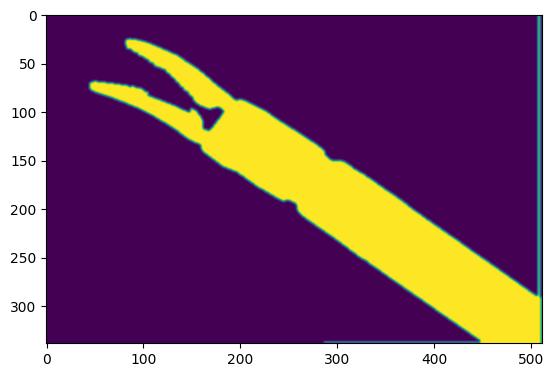

datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation\instrument\mask\grasping_retractor.jpg


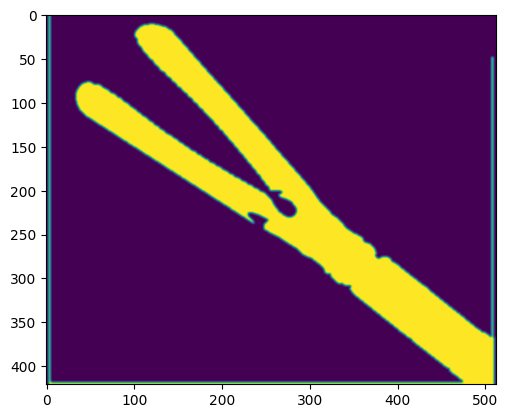

datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation\instrument\mask\monopolar_curved_scissors.jpg


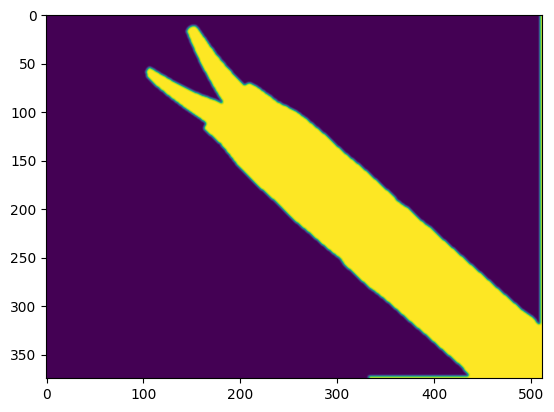

datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation\instrument\mask\needle_driver.jpg


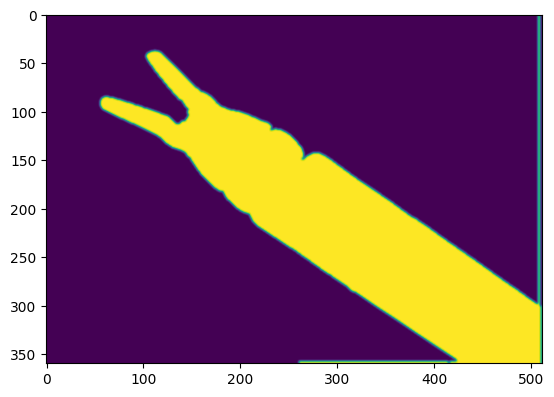

datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation\instrument\mask\prograsp_forceps.jpg


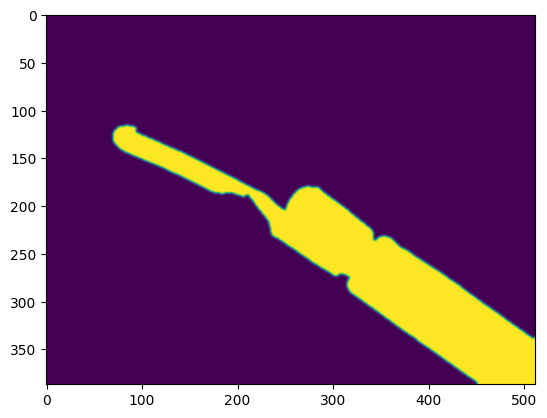

datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation\instrument\mask\vessel_sealer.jpg


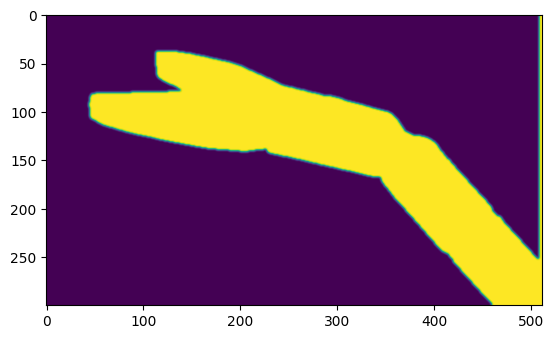

datasets/Endovis2017/visual_prompt/no_combination/binary_segmentation\instrument\mask
[]
['bipolar_forceps.jpg', 'grasping_retractor.jpg', 'monopolar_curved_scissors.jpg', 'needle_driver.jpg', 'prograsp_forceps.jpg', 'vessel_sealer.jpg']
datasets/Endovis2017/visual_prompt/no_combination/instrument_segmentation
['img', 'mask']
['readMe.txt']
datasets/Endovis2017/visual_prompt/no_combination/instrument_segmentation\img
[]
['bipolar_forceps.jpg', 'grasping_retractor.jpg', 'monopolar_curved_scissors.jpg', 'needle_driver.jpg', 'prograsp_forceps.jpg', 'vessel_sealer.jpg']
datasets/Endovis2017/visual_prompt/no_combination/instrument_segmentation\mask\bipolar_forceps.jpg


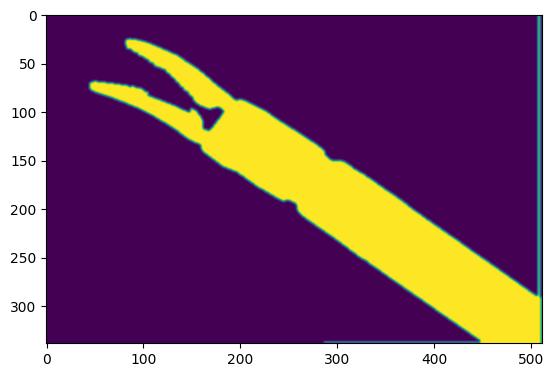

datasets/Endovis2017/visual_prompt/no_combination/instrument_segmentation\mask\grasping_retractor.jpg


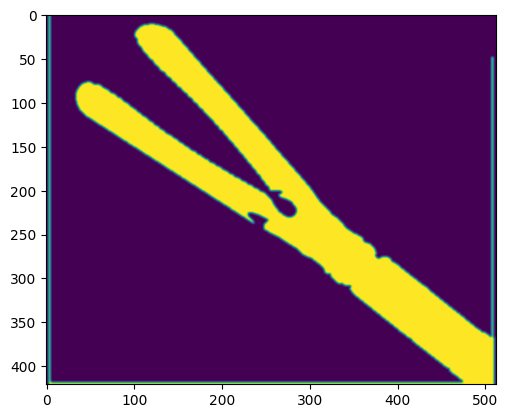

datasets/Endovis2017/visual_prompt/no_combination/instrument_segmentation\mask\monopolar_curved_scissors.jpg


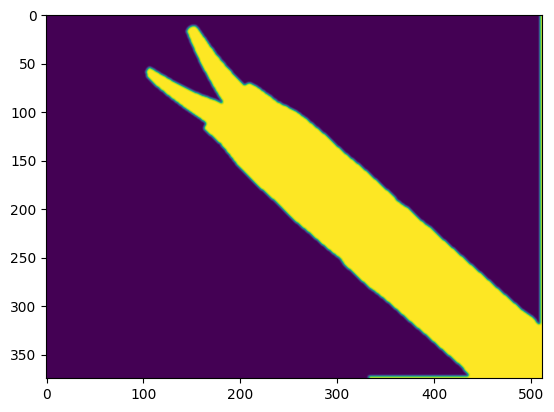

datasets/Endovis2017/visual_prompt/no_combination/instrument_segmentation\mask\needle_driver.jpg


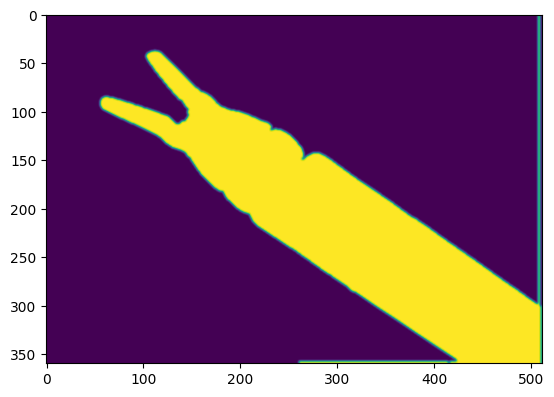

datasets/Endovis2017/visual_prompt/no_combination/instrument_segmentation\mask\prograsp_forceps.jpg


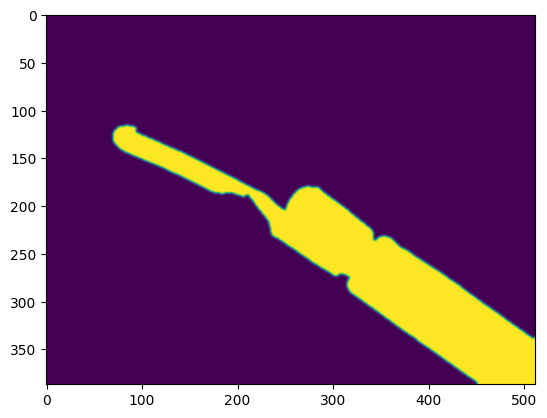

datasets/Endovis2017/visual_prompt/no_combination/instrument_segmentation\mask\vessel_sealer.jpg


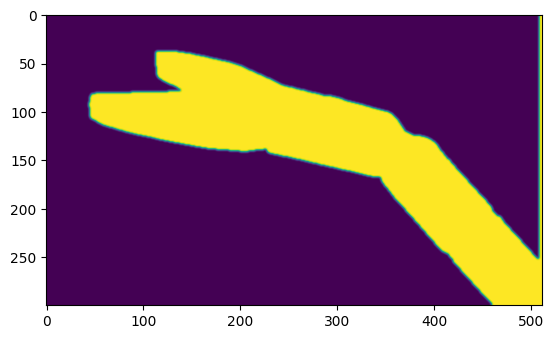

datasets/Endovis2017/visual_prompt/no_combination/instrument_segmentation\mask
[]
['bipolar_forceps.jpg', 'grasping_retractor.jpg', 'monopolar_curved_scissors.jpg', 'needle_driver.jpg', 'prograsp_forceps.jpg', 'vessel_sealer.jpg']
datasets/Endovis2017/visual_prompt/no_combination/part_segmentation
['claspers', 'shaft', 'wrist']
[]
datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\claspers
['img', 'mask']
[]
datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\claspers\img
[]
['sample_1.jpg', 'sample_2.jpg', 'sample_3.jpg', 'sample_4.jpg', 'sample_5.jpg', 'sample_6.jpg']
datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\claspers\mask\sample_1.jpg


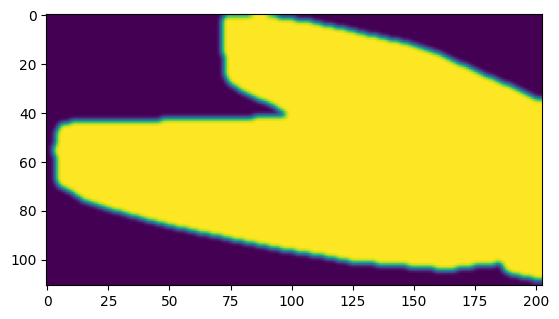

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\claspers\mask\sample_2.jpg


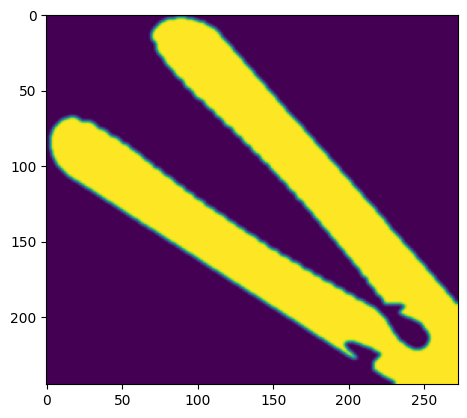

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\claspers\mask\sample_3.jpg


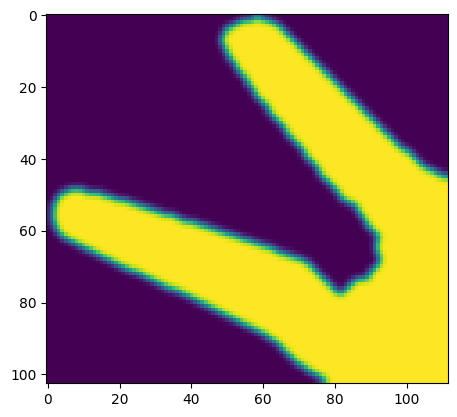

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\claspers\mask\sample_4.jpg


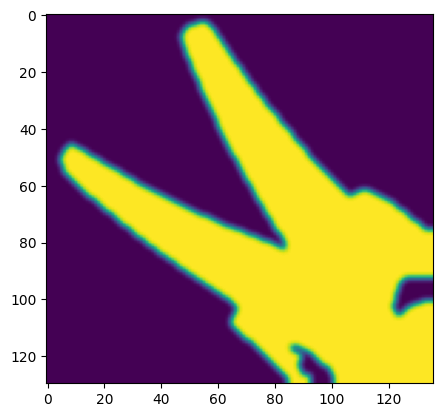

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\claspers\mask\sample_5.jpg


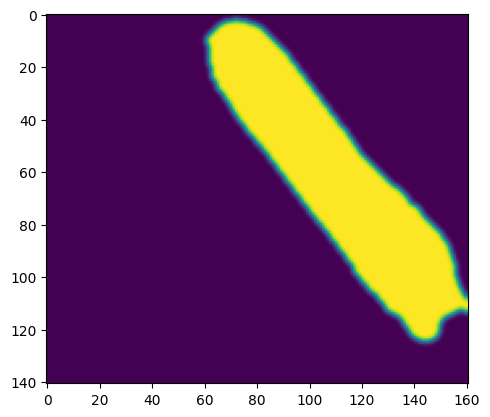

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\claspers\mask\sample_6.jpg


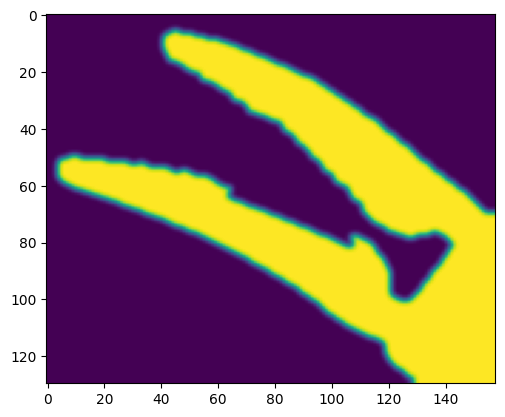

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\claspers\mask
[]
['sample_1.jpg', 'sample_2.jpg', 'sample_3.jpg', 'sample_4.jpg', 'sample_5.jpg', 'sample_6.jpg']
datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\shaft
['img', 'mask']
[]
datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\shaft\img
[]
['sample_1.jpg', 'sample_2.jpg', 'sample_3.jpg', 'sample_4.jpg', 'sample_5.jpg']
datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\shaft\mask\sample_1.jpg


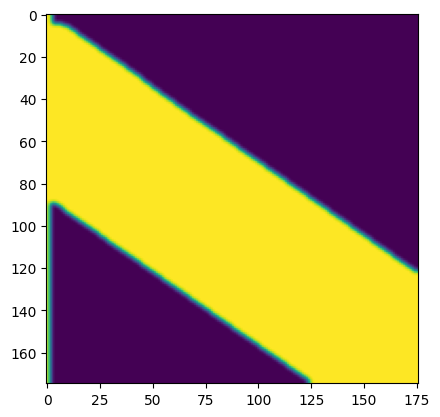

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\shaft\mask\sample_2.jpg


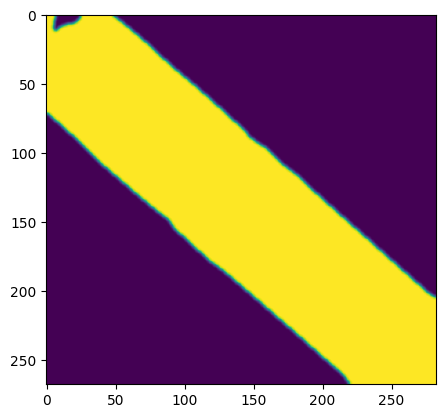

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\shaft\mask\sample_3.jpg


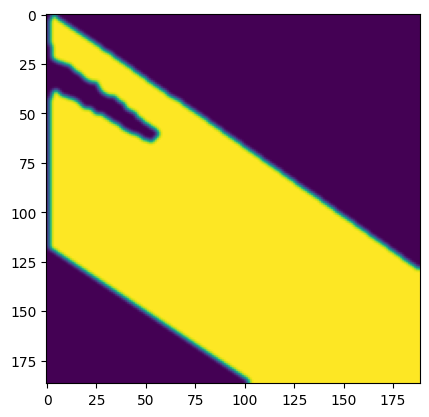

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\shaft\mask\sample_4.jpg


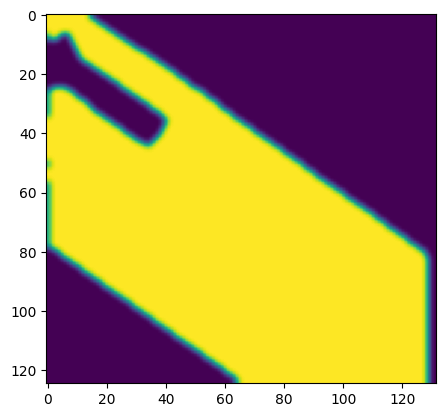

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\shaft\mask\sample_5.jpg


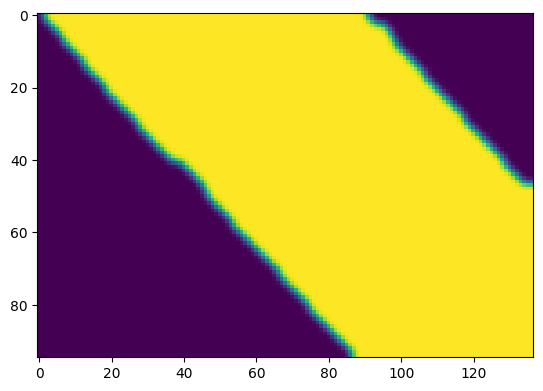

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\shaft\mask
[]
['sample_1.jpg', 'sample_2.jpg', 'sample_3.jpg', 'sample_4.jpg', 'sample_5.jpg']
datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\wrist
['img', 'mask']
[]
datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\wrist\img
[]
['sample_1.jpg', 'sample_2.jpg', 'sample_3.jpg', 'sample_4.jpg', 'sample_5.jpg']
datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\wrist\mask\sample_1.jpg


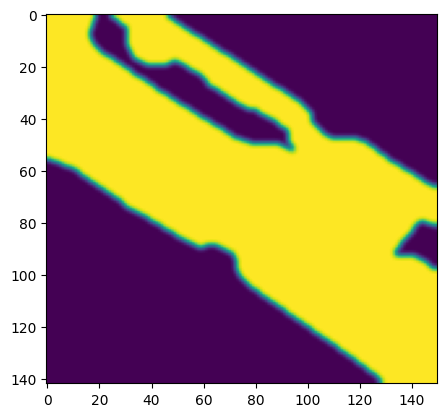

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\wrist\mask\sample_2.jpg


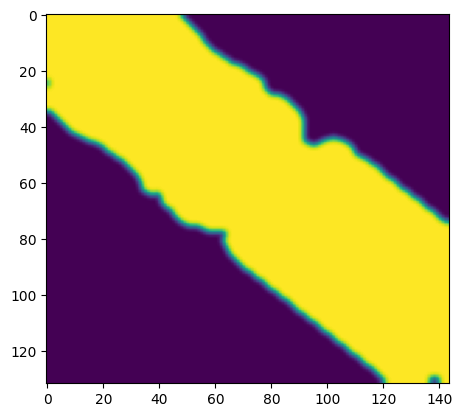

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\wrist\mask\sample_3.jpg


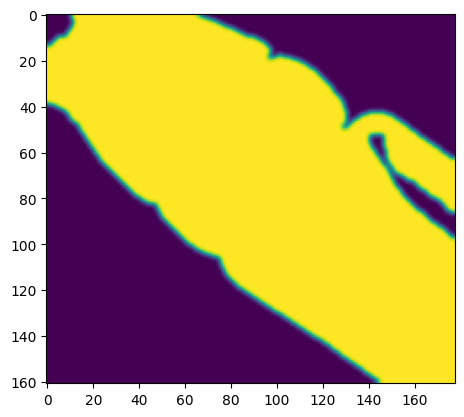

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\wrist\mask\sample_4.jpg


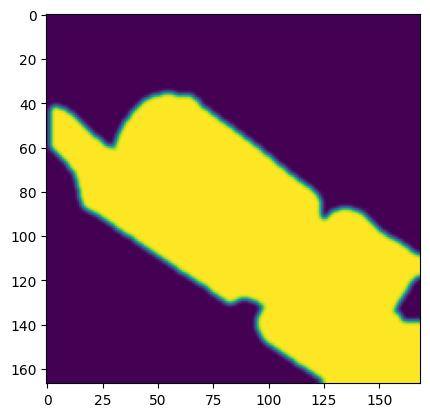

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\wrist\mask\sample_5.jpg


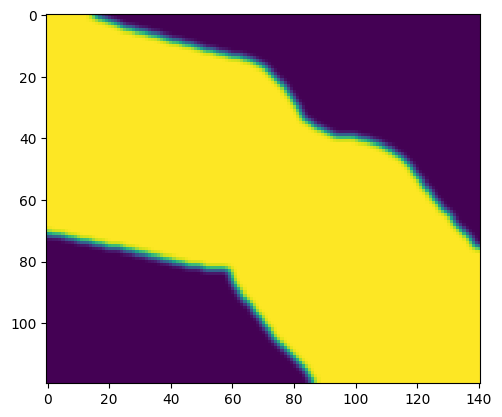

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation\wrist\mask
[]
['sample_1.jpg', 'sample_2.jpg', 'sample_3.jpg', 'sample_4.jpg', 'sample_5.jpg']


In [15]:
process("datasets/Endovis2017/visual_prompt/no_combination/")

datasets/Endovis2017/visual_prompt/no_combination/part_segmentation/wrist/mask/sample_1.jpg


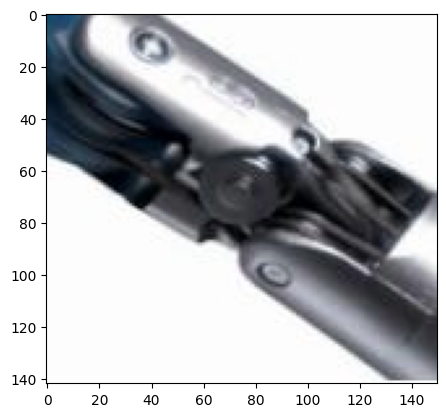

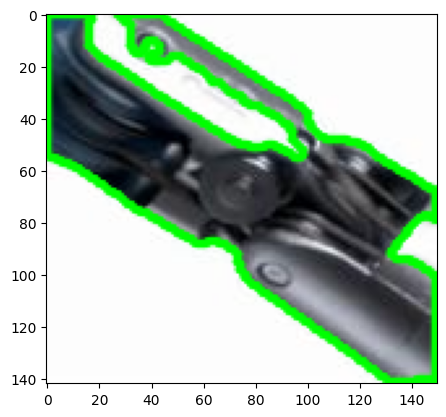

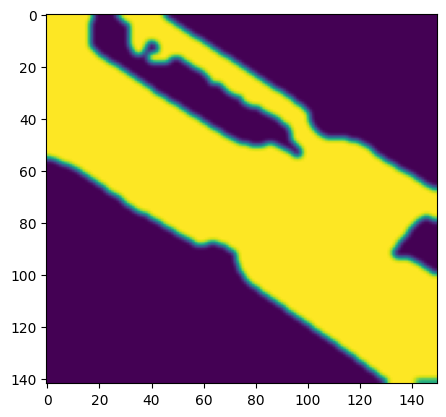

In [13]:
get_segmentation("datasets/Endovis2017/visual_prompt/no_combination/part_segmentation/wrist/img/sample_1.jpg")

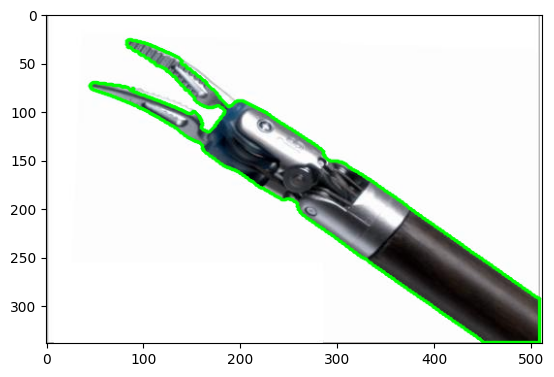

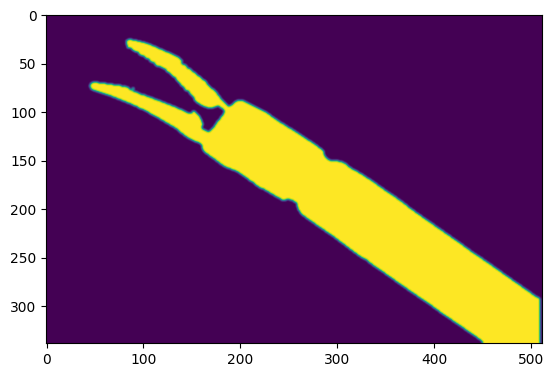

In [74]:
# create `new_mask3d` from `mask2` but with 3 dimensions instead of 2
new_mask3d = mask2
mask3d = new_mask3d
mask3d[new_mask3d > 0] = 255.0
mask3d[mask3d > 255] = 255.0
# apply Gaussian blurring to smoothen out the edges a bit
# `mask3d` is the final foreground mask (not extracted foreground image)
mask3d = cv2.GaussianBlur(mask3d, (5, 5), 0)
plt.imshow(mask3d)
plt.show()

code from https://debuggercafe.com/image-foreground-extraction-using-opencv-contour-detection/